<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\jemko\AppData\Local\Temp\ipykernel_9520\1040460066.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes*
nombre_colonnes = population.shape[1]
print("Le tableau comporte {} colonne(s)".format(nombre_colonnes))
#La nature des données dans chacune des colonnes
print(population.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print(population.count())

Le tableau comporte 3 colonne(s)
Zone       object
Année       int64
Valeur    float64
dtype: object
Zone      1416
Année     1416
Valeur    1416
dtype: int64


In [5]:
#Affichage les 5 premières lignes de la table
print(population.head())

          Zone  Année     Valeur
0  Afghanistan   2013  32269.589
1  Afghanistan   2014  33370.794
2  Afghanistan   2015  34413.603
3  Afghanistan   2016  35383.032
4  Afghanistan   2017  36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur'] * 1000

In [7]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur': 'Population'}, inplace=True)

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
print(population.head())

          Zone  Année  Population
0  Afghanistan   2013  32269589.0
1  Afghanistan   2014  33370794.0
2  Afghanistan   2015  34413603.0
3  Afghanistan   2016  35383032.0
4  Afghanistan   2017  36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print(dispo_alimentaire.shape)

(15605, 18)


In [10]:
#Consulter le nombre de colonnes
#nombre_colonnes = len(population.columns)
#print(nombre_colonnes)
nombre_colonnes = dispo_alimentaire.shape[1]
print(nombre_colonnes)

18


In [11]:
#Affichage les 5 premières lignes de la table
print(dispo_alimentaire.head())

          Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    NaN   
1  Afghanistan        Agrumes, Autres  vegetale                    NaN   
2  Afghanistan  Aliments pour enfants  vegetale                    NaN   
3  Afghanistan                 Ananas  vegetale                    NaN   
4  Afghanistan                Bananes  vegetale                    NaN   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  NaN                                             5.0   
1                  NaN                                             1.0   
2                  NaN                                             1.0   
3                  NaN                                             0.0   
4                  NaN                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1

In [12]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace=True)

In [13]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
dispo_alimentaire['Disponibilité intérieure'] = dispo_alimentaire['Disponibilité intérieure'] * 1000000

In [14]:
#Affichage les 5 premières lignes de la table
print(dispo_alimentaire.head())

          Zone                Produit   Origine  Aliments pour animaux  \
0  Afghanistan       Abats Comestible   animale                    0.0   
1  Afghanistan        Agrumes, Autres  vegetale                    0.0   
2  Afghanistan  Aliments pour enfants  vegetale                    0.0   
3  Afghanistan                 Ananas  vegetale                    0.0   
4  Afghanistan                Bananes  vegetale                    0.0   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  0.0                                             5.0   
1                  0.0                                             1.0   
2                  0.0                                             1.0   
3                  0.0                                             0.0   
4                  0.0                                             4.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [15]:
#Afficher les dimensions du dataset
print(aide_alimentaire.shape)

(1475, 4)


In [16]:
#Consulter le nombre de colonnes
nombre_colonnes = len(aide_alimentaire.columns)
print(nombre_colonnes)

4


In [17]:
#Affichage les 5 premières lignes de la table
print(aide_alimentaire.head())

  Pays bénéficiaire  Année              Produit  Valeur
0       Afghanistan   2013  Autres non-céréales     682
1       Afghanistan   2014  Autres non-céréales     335
2       Afghanistan   2013         Blé et Farin   39224
3       Afghanistan   2014         Blé et Farin   15160
4       Afghanistan   2013             Céréales   40504


In [18]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'}, inplace=True)

In [19]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur'] * 1000

In [20]:
#Affichage les 5 premières lignes de la table
print(aide_alimentaire.head())

          Zone  Année              Produit    Valeur
0  Afghanistan   2013  Autres non-céréales    682000
1  Afghanistan   2014  Autres non-céréales    335000
2  Afghanistan   2013         Blé et Farin  39224000
3  Afghanistan   2014         Blé et Farin  15160000
4  Afghanistan   2013             Céréales  40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
print(sous_nutrition.shape)

(1218, 3)


In [22]:
#Consulter le nombre de colonnes
nombre_colonnes = len(sous_nutrition.columns)
print(nombre_colonnes)

3


In [23]:
#Afficher les 5 premières lignes de la table
print(sous_nutrition.head())

          Zone      Année Valeur
0  Afghanistan  2012-2014    8.6
1  Afghanistan  2013-2015    8.8
2  Afghanistan  2014-2016    8.9
3  Afghanistan  2015-2017    9.7
4  Afghanistan  2016-2018   10.5


In [24]:
#Conversion de la colonne sous nutrition en numérique

In [25]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].fillna(0)

In [26]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={'Valeur': 'sous_nutrition'}, inplace=True)

In [27]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] = sous_nutrition['sous_nutrition'] * 1000000

In [28]:
#Afficher les 5 premières lignes de la table
print(sous_nutrition.head())

          Zone      Année  sous_nutrition
0  Afghanistan  2012-2014       8600000.0
1  Afghanistan  2013-2015       8800000.0
2  Afghanistan  2014-2016       8900000.0
3  Afghanistan  2015-2017       9700000.0
4  Afghanistan  2016-2018      10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [29]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
population_2017 = population[population['Année'] == 2017]
sous_nutrition_2017 = sous_nutrition[sous_nutrition['Année'] == '2017-2019'] 

jointure = pd.merge(population_2017, sous_nutrition_2017, on='Zone', how='inner')

In [30]:
#Affichage du dataset
print(jointure)

                                       Zone  Année_x  Population    Année_y  \
0                               Afghanistan     2017  36296113.0  2017-2019   
1                            Afrique du Sud     2017  57009756.0  2017-2019   
2                                   Albanie     2017   2884169.0  2017-2019   
3                                   Algérie     2017  41389189.0  2017-2019   
4                                 Allemagne     2017  82658409.0  2017-2019   
..                                      ...      ...         ...        ...   
198  Venezuela (République bolivarienne du)     2017  29402484.0  2017-2019   
199                                Viet Nam     2017  94600648.0  2017-2019   
200                                   Yémen     2017  27834819.0  2017-2019   
201                                  Zambie     2017  16853599.0  2017-2019   
202                                Zimbabwe     2017  14236595.0  2017-2019   

     sous_nutrition  
0        11100000.0  
1      

In [31]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
total_sous_nutrition = jointure['sous_nutrition'].sum()
print(f"Nombre total de personnes en état de sous-nutrition : {total_sous_nutrition} personnes")

# Calcul de la population totale
#population_totale = jointure['Population'].sum() 

# Calcul du pourcentage de sous-nutrition
#pourcentage_sous_nutrition = (total_sous_nutrition / population_totale) * 100

# Affichage du résultat
#print(f"Pourcentage de personnes en état de sous-nutrition : {pourcentage_sous_nutrition:.2f}%")

Nombre total de personnes en état de sous-nutrition : 544200000.0 personnes


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [32]:
#Combien mange en moyenne un être humain ? 
# Pour les femmes, l'apport recommandé est souvent d'environ 2 000 à 2 400 calories par jour.
# Pour les hommes, il est généralement d'environ 2 500 à 3 000 calories par jour.
# Je vais donc prendre un moyenne de 2500 kcal Source => d'après Organisation Mondiale de la Santé (OMS)

In [33]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
# La colonne "Zone" est utilisée comme clé de jointure
dispo_alimentaire_avec_population = dispo_alimentaire.merge(population, on='Zone', how='left')

In [34]:
#Affichage du nouveau dataframe
print(dispo_alimentaire_avec_population)

               Zone           Produit   Origine  Aliments pour animaux  \
0       Afghanistan  Abats Comestible   animale                    0.0   
1       Afghanistan  Abats Comestible   animale                    0.0   
2       Afghanistan  Abats Comestible   animale                    0.0   
3       Afghanistan  Abats Comestible   animale                    0.0   
4       Afghanistan  Abats Comestible   animale                    0.0   
...             ...               ...       ...                    ...   
92680  Îles Salomon    Épices, Autres  vegetale                    0.0   
92681  Îles Salomon    Épices, Autres  vegetale                    0.0   
92682  Îles Salomon    Épices, Autres  vegetale                    0.0   
92683  Îles Salomon    Épices, Autres  vegetale                    0.0   
92684  Îles Salomon    Épices, Autres  vegetale                    0.0   

       Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                      0.0       

In [35]:
# Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
# Création de la colonne dispo_kcal en multipliant la disponibilité alimentaire par la population
dispo_alimentaire_avec_population['dispo_kcal'] = dispo_alimentaire_avec_population['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alimentaire_avec_population['Population']

# Affichage des premières lignes du DataFrame pour vérification
print(dispo_alimentaire_avec_population.head())

          Zone           Produit  Origine  Aliments pour animaux  \
0  Afghanistan  Abats Comestible  animale                    0.0   
1  Afghanistan  Abats Comestible  animale                    0.0   
2  Afghanistan  Abats Comestible  animale                    0.0   
3  Afghanistan  Abats Comestible  animale                    0.0   
4  Afghanistan  Abats Comestible  animale                    0.0   

   Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                  0.0                                             5.0   
1                  0.0                                             5.0   
2                  0.0                                             5.0   
3                  0.0                                             5.0   
4                  0.0                                             5.0   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.72        
1                       

In [36]:
#Calcul du nombre d'humains pouvant être nourris
# Calcul de la disponibilité alimentaire totale en kilocalories par jour pour l'ensemble du monde
disponibilite_totale_kcal = dispo_alimentaire_avec_population['dispo_kcal'].sum()

# Quantité moyenne de kilocalories nécessaires par personne et par jour
kcal_necessaires_par_personne_par_jour = 2500  

# Calcul du nombre estimé d'humains pouvant être nourris
kcal_par_personne_disponible = disponibilite_totale_kcal / kcal_necessaires_par_personne_par_jour

kcal_par_personne_disponible

49419642926.9804

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [37]:
# Transfert des données avec les végétaux dans un nouveau dataframe
# Filtrer les lignes avec des aliments d'origine végétale
vegetaux_df = dispo_alimentaire_avec_population[dispo_alimentaire_avec_population['Origine'] == 'vegetale']

# Affichage des premières lignes du nouveau DataFrame
print(vegetaux_df.head())

           Zone          Produit   Origine  Aliments pour animaux  \
6   Afghanistan  Agrumes, Autres  vegetale                    0.0   
7   Afghanistan  Agrumes, Autres  vegetale                    0.0   
8   Afghanistan  Agrumes, Autres  vegetale                    0.0   
9   Afghanistan  Agrumes, Autres  vegetale                    0.0   
10  Afghanistan  Agrumes, Autres  vegetale                    0.0   

    Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
6                   0.0                                             1.0   
7                   0.0                                             1.0   
8                   0.0                                             1.0   
9                   0.0                                             1.0   
10                  0.0                                             1.0   

    Disponibilité alimentaire en quantité (kg/personne/an)  \
6                                                1.29        
7         

In [38]:
#Calcul du nombre de kcal disponible pour les végétaux
# Calcul de la disponibilité alimentaire totale en kilocalories pour les végétaux
kcal_disponibles_vegetaux = vegetaux_df['dispo_kcal'].sum()

kcal_disponibles_vegetaux

101870153138544.0

In [39]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
# Calcul de la disponibilité alimentaire totale en kilocalories pour les aliments d'origine végétale
kcal_disponibles_vegetaux = vegetaux_df['dispo_kcal'].sum()

# Quantité moyenne de kilocalories nécessaires par personne et par jour
kcal_necessaires_par_personne_par_jour = 2500  # Modifier selon vos estimations

# Calcul du nombre estimé d'humains pouvant être nourris avec les végétaux
kcal_vegetal_par_personne_disponible = kcal_disponibles_vegetaux / kcal_necessaires_par_personne_par_jour

kcal_vegetal_par_personne_disponible

40748061255.4176

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [40]:
#Calcul de la disponibilité interieure
dispo_alimentaire['Disponibilité intérieure'] = (dispo_alimentaire['Production'] + 
                                                 dispo_alimentaire['Importations - Quantité'] - 
                                                 dispo_alimentaire['Exportations - Quantité'] + 
                                                 dispo_alimentaire['Variation de stock'])

# Calcul du total de la Disponibilité intérieure
total_disponibilite_interieure = dispo_alimentaire['Disponibilité intérieure'].sum()

# Affichage du total
print(f"Total de la Disponibilité intérieure : {total_disponibilite_interieure}")

Total de la Disponibilité intérieure : 9849173.0


Part de Aliments pour animaux : 19.67%
Part de Pertes : 6.90%
Part de Nourriture : 73.43%


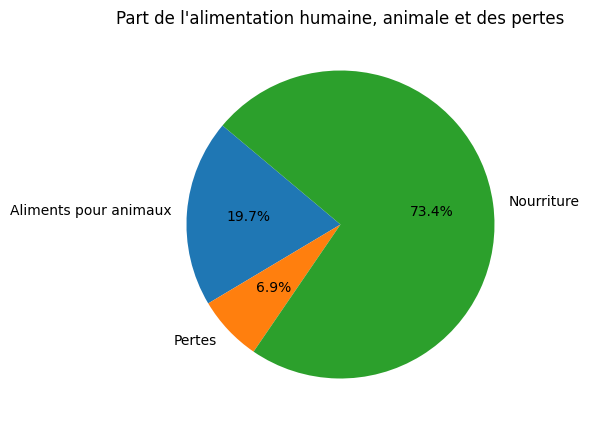

In [41]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
# Liste des colonnes à afficher
colonnes_a_afficher = ['Aliments pour animaux', 'Pertes', 'Nourriture']

# Liste des colonnes à analyser
colonnes_a_afficher = ['Aliments pour animaux', 'Pertes', 'Nourriture']

# Calcul du total général pour toutes les catégories
total_general = dispo_alimentaire_avec_population[colonnes_a_afficher].sum().sum()

# Boucle pour calculer et afficher la part de chaque catégorie
for colonne in colonnes_a_afficher:
    # Calcul du total pour la catégorie courante
    total_categorie = dispo_alimentaire_avec_population[colonne].sum()
    
    # Calcul de la part de cette catégorie par rapport au total général
    part = (total_categorie / total_general) * 100
    
    # Affichage de la part de la catégorie courante
    print(f"Part de {colonne} : {part:.2f}%")

# Liste des colonnes à analyser
colonnes_a_afficher = ['Aliments pour animaux', 'Pertes', 'Nourriture']

# Calcul des totaux pour chaque catégorie
totaux = [dispo_alimentaire_avec_population[colonne].sum() for colonne in colonnes_a_afficher]

# Création du diagramme circulaire
plt.figure(figsize=(5, 5))  # Définit la taille du graphique
plt.pie(totaux, labels=colonnes_a_afficher, autopct='%1.1f%%', startangle=140)
plt.title('Part de l\'alimentation humaine, animale et des pertes')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [104]:
# Remplir les valeurs manquantes par 0
dispo_alimentaire = dispo_alimentaire.fillna(0)

# Liste des céréales à filtrer
cereales = ["Blé", "Avoine", "Céréales, autres", "Maïs", "Orge", "Riz (Eq blanchi)", "Millet", "Sorgho"]

# Filtrer le DataFrame pour inclure uniquement les entrées correspondant aux céréales de la liste
bd_cereales = dispo_alimentaire.loc[dispo_alimentaire["Produit"].isin(cereales)]

# Création d'un nouveau DataFrame avec les informations uniquement pour les céréales spécifiées
bd_cereales.head()

Zone Produit   Origine  Aliments pour animaux  \
7      Afghanistan     Blé  vegetale                    0.0   
32     Afghanistan    Maïs  vegetale                  200.0   
34     Afghanistan  Millet  vegetale                    0.0   
40     Afghanistan    Orge  vegetale                  360.0   
67  Afrique du Sud  Avoine  vegetale                    8.0   

    Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
7                   0.0                                          1369.0   
32                  0.0                                            21.0   
34                  0.0                                             3.0   
40                  0.0                                            26.0   
67                  0.0                                             5.0   

    Disponibilité alimentaire en quantité (kg/personne/an)  \
7                                              160.23        
32                                               2.50        
34                                               0.40        
40                                               2.92        
67                                               0.75        

    Disponibilité de matière grasse en quantité (g/personne/jour)  \
7                                                4.69               
32                                               0.30               
34                                               0.02               
40                                               0.24               
67                                               0.09               

    Disponibilité de protéines en quantité (g/personne/jour)  \
7                                               36.91          
32                                               0.56          
34                                               0.08          
40                                               0.79          
67                                               0.16          

    Disponibilité intérieure  Exportations - Quantité  \
7                     5992.0                      0.0   
32                     313.0                      0.0   
34                      13.0                      0.0   
40                     524.0                      0.0   
67                      49.0                      4.0   

    Importations - Quantité  Nourriture  Pertes  Production  Semences  \
7                    1173.0      4895.0   775.0      5169.0     322.0   
32                      1.0        76.0    31.0       312.0       5.0   
34                      0.0        12.0     1.0        13.0       0.0   
40                     10.0        89.0    52.0       514.0      22.0   
67                     25.0        40.0     1.0        28.0       1.0   

    Traitement  Variation de stock  
7          0.0              -350.0  
32         0.0                 0.0  
34         0.0                 0.0  
40         0.0                 0.0  
67         0.0                 0.0

In [107]:
#Affichage de la proportion d'alimentation animale

# Calcul de la proportion utilisée pour l'alimentation humaine
dispo_cereales['Proportion_Alimentation_Humaine'] = dispo_cereales['Nourriture'] / dispo_cereales['Disponibilité intérieure']

# Calcul de la proportion utilisée pour l'alimentation animale
dispo_cereales['Proportion_Alimentation_Animale'] = dispo_cereales['Aliments pour animaux'] / dispo_cereales['Disponibilité intérieure']

# Affichage des résultats pour les céréales
dispo_cereales[['Zone', 'Produit', 'Proportion_Alimentation_Humaine', 'Proportion_Alimentation_Animale']].head()


C:\Users\jemko\AppData\Local\Temp\ipykernel_9520\3736364913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dispo_cereales['Proportion_Alimentation_Humaine'] = dispo_cereales['Nourriture'] / dispo_cereales['Disponibilité intérieure']
C:\Users\jemko\AppData\Local\Temp\ipykernel_9520\3736364913.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dispo_cereales['Proportion_Alimentation_Animale'] = dispo_cereales['Aliments pour animaux'] / dispo_cereales['Disponibilité intérieure']


Zone Produit  Proportion_Alimentation_Humaine  \
7      Afghanistan     Blé                         0.816923   
32     Afghanistan    Maïs                         0.242812   
34     Afghanistan  Millet                         0.923077   
40     Afghanistan    Orge                         0.169847   
67  Afrique du Sud  Avoine                         0.816327   

    Proportion_Alimentation_Animale  
7                          0.000000  
32                         0.638978  
34                         0.000000  
40                         0.687023  
67                         0.163265

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [46]:
#Création de la colonne proportion par pays
# Calcul de la proportion de personnes sous-alimentées par pays
jointure['Proportion_sous_alimentées'] = (jointure['sous_nutrition'].astype(float) / jointure['Population'].astype(float)) * 100

# Affichage des résultats pour vérifier
print(jointure[['Zone', 'Proportion_sous_alimentées']])

                                       Zone  Proportion_sous_alimentées
0                               Afghanistan                   30.581787
1                            Afrique du Sud                    5.788483
2                                   Albanie                    3.467203
3                                   Algérie                    2.899308
4                                 Allemagne                    0.000000
..                                      ...                         ...
198  Venezuela (République bolivarienne du)                   30.949766
199                                Viet Nam                    6.448159
200                                   Yémen                    0.000000
201                                  Zambie                    0.000000
202                                Zimbabwe                    0.000000

[203 rows x 2 columns]


                                           Zone  Proportion_sous_alimentées
78                                        Haïti                   49.169733
157  République populaire démocratique de Corée                   47.975163
108                                  Madagascar                   43.018302
183                                       Tchad                   40.621298
103                                     Libéria                   38.279742
161                                      Rwanda                   36.724934
121                                  Mozambique                   33.509002
100                                     Lesotho                   33.468258
186                                 Timor-Leste                   32.173531
198      Venezuela (République bolivarienne du)                   30.949766


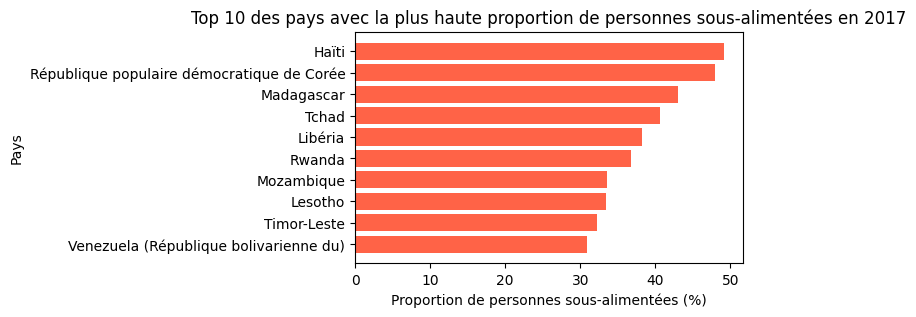

In [47]:
#affichage après trie des 10 pires pays

# Trier le DataFrame par la proportion de personnes sous-alimentées dans l'ordre décroissant
jointure_triee = jointure.sort_values(by='Proportion_sous_alimentées', ascending=False)

# Sélectionner les 10 premiers pays ayant la plus haute proportion de personnes sous-alimentées
top_10_pires_pays = jointure_triee.head(10)

# Afficher les résultats
print(top_10_pires_pays[['Zone', 'Proportion_sous_alimentées']])

# Créer un graphique à barres
plt.figure(figsize=(5, 3))  # Définir la taille du graphique
plt.barh(top_10_pires_pays['Zone'], top_10_pires_pays['Proportion_sous_alimentées'], color='tomato')  # Créer un graphique à barres horizontales
plt.xlabel('Proportion de personnes sous-alimentées (%)')  # Ajouter une étiquette pour l'axe des x
plt.ylabel('Pays')  # Ajouter une étiquette pour l'axe des y
plt.title('Top 10 des pays avec la plus haute proportion de personnes sous-alimentées en 2017')  # Ajouter un titre
plt.gca().invert_yaxis()  # Inverser l'axe des y pour que le pays avec la plus haute proportion soit en haut
plt.show()  # Afficher le graphique

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [48]:
#calcul du total de l'aide alimentaire par pays
# Calcul du total de l'aide alimentaire par pays
total_aide_par_pays = aide_alimentaire.groupby('Zone')['Valeur'].sum()

# Affichage du total de l'aide alimentaire par pays
print(total_aide_par_pays)


Zone
Afghanistan     185452000
Algérie          81114000
Angola            5014000
Bangladesh      348188000
Bhoutan           2666000
                  ...    
Zambie            3026000
Zimbabwe         62570000
Égypte            1122000
Équateur          1362000
Éthiopie       1381294000
Name: Valeur, Length: 76, dtype: int64


Zone
République arabe syrienne           1858943000
Éthiopie                            1381294000
Yémen                               1206484000
Soudan du Sud                        695248000
Soudan                               669784000
Kenya                                552836000
Bangladesh                           348188000
Somalie                              292678000
République démocratique du Congo     288502000
Niger                                276344000
Name: Valeur, dtype: int64


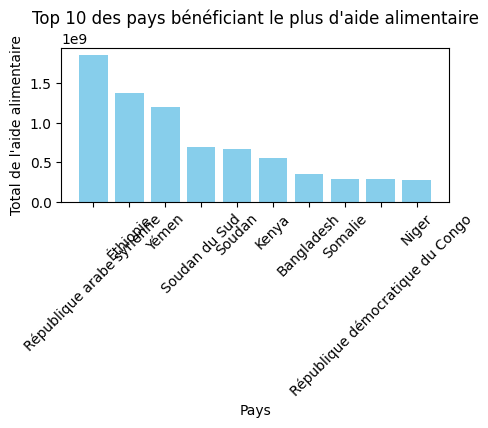

In [49]:
# Trier les totaux de l'aide alimentaire par pays dans l'ordre décroissant
total_aide_par_pays_trie = total_aide_par_pays.sort_values(ascending=False)

# Sélectionner les 10 premiers pays qui ont bénéficié le plus d'aide alimentaire
top_10_pays_aide = total_aide_par_pays_trie.head(10)

## Afficher les 10 premiers pays qui ont bénéficié le plus d'aide alimentaire
print(top_10_pays_aide)

# Création d'un graphique à barres
plt.figure(figsize=(5, 2))  # Définit la taille du graphique
plt.bar(top_10_pays_aide.index, top_10_pays_aide.values, color='skyblue')  # Crée un graphique à barres
plt.title('Top 10 des pays bénéficiant le plus d\'aide alimentaire')  # Ajoute un titre
plt.xlabel('Pays')  # Étiquette pour l'axe des x
plt.ylabel('Total de l\'aide alimentaire')  # Étiquette pour l'axe des y
plt.xticks(rotation=45)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.show()  # Affiche le graphique

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [50]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
nouveau_df = aide_alimentaire[['Zone', 'Année', 'Valeur']]

# Groupby sur les colonnes 'Zone' et 'Année' et calcul de la somme de l'aide alimentaire
groupe_par_zone_annee = nouveau_df.groupby(['Zone', 'Année']).sum()

# Affichage du DataFrame résultant
print(groupe_par_zone_annee)

                      Valeur
Zone        Année           
Afghanistan 2013   128238000
            2014    57214000
Algérie     2013    35234000
            2014    18980000
            2015    17424000
...                      ...
Égypte      2013     1122000
Équateur    2013     1362000
Éthiopie    2013   591404000
            2014   586624000
            2015   203266000

[228 rows x 1 columns]


['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']


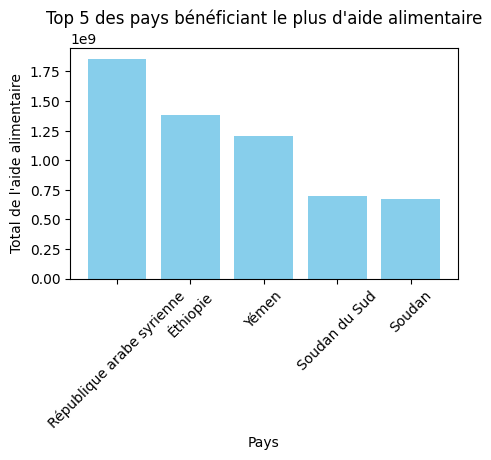

In [51]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
# Trier les totaux de l'aide alimentaire par pays dans l'ordre décroissant
total_aide_par_pays_trie = total_aide_par_pays.sort_values(ascending=False)

# Sélectionner les 5 premiers pays qui ont bénéficié le plus d'aide alimentaire
top_5_pays_aide = total_aide_par_pays_trie.head(5)

# Créer une liste contenant les noms des 5 pays
liste_top_5_pays_aide = top_5_pays_aide.index.tolist()

# Afficher la liste des 5 pays qui ont bénéficié le plus d'aide alimentaire
print(liste_top_5_pays_aide)

# Création du graphique à barres
plt.figure(figsize=(5, 3))  # Définit la taille du graphique
plt.bar(top_5_pays_aide.index, top_5_pays_aide.values, color='skyblue')  # Crée un graphique à barres pour les 5 pays
plt.title('Top 5 des pays bénéficiant le plus d\'aide alimentaire')  # Ajoute un titre
plt.xlabel('Pays')  # Étiquette pour l'axe des x
plt.ylabel('Total de l\'aide alimentaire')  # Étiquette pour l'axe des y
plt.xticks(rotation=45)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.show()  # Affiche le graphique

In [52]:
#On filtre sur le dataframe avec notre liste
# Filtrer le DataFrame avec la liste des 5 pays qui ont le plus bénéficié de l'aide alimentaire
aide_alimentaire_filtre = aide_alimentaire[aide_alimentaire['Zone'].isin(liste_top_5_pays_aide)]

# Afficher le DataFrame filtré
print(aide_alimentaire_filtre)

          Zone  Année              Produit     Valeur
354   Éthiopie   2013  Autres non-céréales     170000
355   Éthiopie   2014  Autres non-céréales     466000
356   Éthiopie   2015  Autres non-céréales     244000
357   Éthiopie   2013         Blé et Farin  181066000
358   Éthiopie   2014         Blé et Farin  178646000
...        ...    ...                  ...        ...
1447     Yémen   2015           Riz, total    1797000
1448     Yémen   2013         Sucre, total     161000
1449     Yémen   2014         Sucre, total      81000
1450     Yémen   2015         Sucre, total    7617000
1451     Yémen   2016         Sucre, total    2675000

[155 rows x 4 columns]


In [53]:
# Affichage des pays avec l'aide alimentaire par année
# Groupby sur les colonnes 'Pays' et 'Année' et calcul de la somme de l'aide alimentaire
aide_alimentaire_par_annee = aide_alimentaire_filtre.groupby(['Zone', 'Année'])['Valeur'].sum()

# Affichage du DataFrame résultant
print(aide_alimentaire_par_annee)

Zone                       Année
République arabe syrienne  2013     563566000
                           2014     651870000
                           2015     524949000
                           2016     118558000
Soudan                     2013     330230000
                           2014     321904000
                           2015      17650000
Soudan du Sud              2013     196330000
                           2014     450610000
                           2015      48308000
Yémen                      2013     264764000
                           2014     103840000
                           2015     372306000
                           2016     465574000
Éthiopie                   2013     591404000
                           2014     586624000
                           2015     203266000
Name: Valeur, dtype: int64


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [66]:
#Calcul de la disponibilité en kcal par personne par jour par pays
# Effectuer une jointure entre les données de disponibilité alimentaire et de population par pays
donnees_combinees = dispo_alimentaire.merge(population, on='Zone')

# Calculer la disponibilité en kcal par personne par an
donnees_combinees['Disponibilite_kcal_par_personne_an'] = donnees_combinees['Disponibilité alimentaire (Kcal/personne/jour)'] / donnees_combinees['Population']

# Nombre de jours dans une année
jours_annee = 365

# Calculer la disponibilité en kcal par personne par jour
donnees_combinees['Disponibilite_kcal_par_personne_jour'] = donnees_combinees['Disponibilite_kcal_par_personne_an'] / jours_annee

# Afficher les données résultantes
print(donnees_combinees[['Zone', 'Disponibilite_kcal_par_personne_jour']])

               Zone  Disponibilite_kcal_par_personne_jour
0       Afghanistan                          4.245059e-10
1       Afghanistan                          4.104976e-10
2       Afghanistan                          3.980586e-10
3       Afghanistan                          3.871525e-10
4       Afghanistan                          3.774131e-10
...             ...                                   ...
92491  Îles Salomon                          1.866683e-08
92492  Îles Salomon                          1.817041e-08
92493  Îles Salomon                          1.769169e-08
92494  Îles Salomon                          1.722992e-08
92495  Îles Salomon                          1.678607e-08

[92496 rows x 2 columns]


In [67]:
donnees_combinees

Zone           Produit   Origine  Aliments pour animaux  \
0       Afghanistan  Abats Comestible   animale                    0.0   
1       Afghanistan  Abats Comestible   animale                    0.0   
2       Afghanistan  Abats Comestible   animale                    0.0   
3       Afghanistan  Abats Comestible   animale                    0.0   
4       Afghanistan  Abats Comestible   animale                    0.0   
...             ...               ...       ...                    ...   
92491  Îles Salomon    Épices, Autres  vegetale                    0.0   
92492  Îles Salomon    Épices, Autres  vegetale                    0.0   
92493  Îles Salomon    Épices, Autres  vegetale                    0.0   
92494  Îles Salomon    Épices, Autres  vegetale                    0.0   
92495  Îles Salomon    Épices, Autres  vegetale                    0.0   

       Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
0                      0.0                                             5.0   
1                      0.0                                             5.0   
2                      0.0                                             5.0   
3                      0.0                                             5.0   
4                      0.0                                             5.0   
...                    ...                                             ...   
92491                  0.0                                             4.0   
92492                  0.0                                             4.0   
92493                  0.0                                             4.0   
92494                  0.0                                             4.0   
92495                  0.0                                             4.0   

       Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                                   1.72        
1                                                   1.72        
2                                                   1.72        
3                                                   1.72        
4                                                   1.72        
...                                                  ...        
92491                                               0.48        
92492                                               0.48        
92493                                               0.48        
92494                                               0.48        
92495                                               0.48        

       Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                   0.20               
1                                                   0.20               
2                                                   0.20               
3                                                   0.20               
4                                                   0.20               
...                                                  ...               
92491                                               0.21               
92492                                               0.21               
92493                                               0.21               
92494                                               0.21               
92495                                               0.21               

       Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                   0.77          
1                                                   0.77          
2                                                   0.77          
3                                                   0.77          
4                                                   0.77          
...                                                  ...          
92491                                               0.15          
92492  

<Axes: xlabel='Zone'>

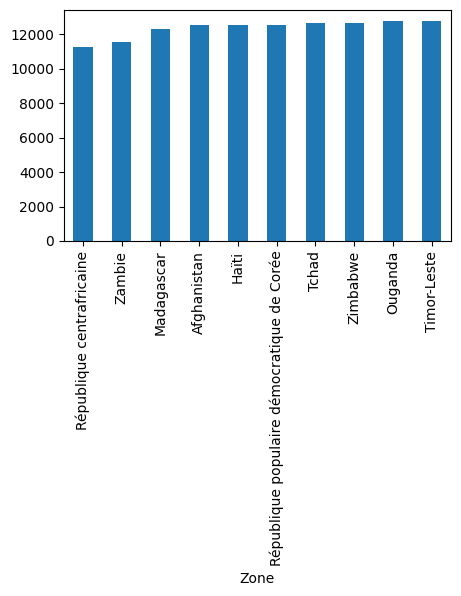

In [94]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
# Trier les données par disponibilité alimentaire par personne de manière croissante
donnees_combinees_triees = donnees_combinees.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)')

# Afficher les résultats
pays_moins_dispo_alimentaire = donnees_combinees_triees.groupby('Zone').sum()
pays_moins_dispo_alimentaire.Disponibilite_kcal_par_personne_jour

# Création du graphique à barres horizontales
pays_moins_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].sort_values().head(10).plot(kind="bar", figsize=(5, 3))

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

<Axes: xlabel='Zone'>

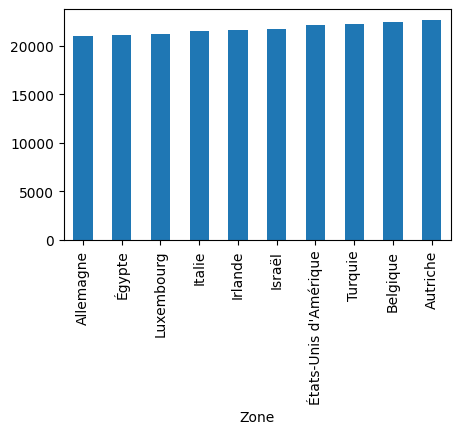

In [93]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
# Trier les données par disponibilité alimentaire par personne de manière décroissante
donnees_combinees_triees = donnees_combinees.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)')

# Sélectionner les 10 premiers pays avec la plus grande disponibilité alimentaire par personne
pays_plus_dispo_alimentaire = donnees_combinees_triees.groupby('Zone').sum()
pays_plus_dispo_alimentaire.Disponibilite_kcal_par_personne_jour

# Afficher les résultats
# print(pays_plus_dispo_alimentaire[['Zone', 'Disponibilite_kcal_par_personne_jour']])
pays_plus_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].sort_values().tail(10).plot(kind="bar", figsize=(5, 3))

# Création du graphique à barres horizontales

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [57]:
#création d'un dataframe avec uniquement la Thaïlande 
donnees_thailande = donnees_combinees.loc[donnees_combinees['Zone'] == 'Thaïlande']

# Affichage du DataFrame pour vérification
print(donnees_thailande)

            Zone           Produit   Origine  Aliments pour animaux  \
81420  Thaïlande  Abats Comestible   animale                    0.0   
81421  Thaïlande  Abats Comestible   animale                    0.0   
81422  Thaïlande  Abats Comestible   animale                    0.0   
81423  Thaïlande  Abats Comestible   animale                    0.0   
81424  Thaïlande  Abats Comestible   animale                    0.0   
...          ...               ...       ...                    ...   
81985  Thaïlande    Épices, Autres  vegetale                    0.0   
81986  Thaïlande    Épices, Autres  vegetale                    0.0   
81987  Thaïlande    Épices, Autres  vegetale                    0.0   
81988  Thaïlande    Épices, Autres  vegetale                    0.0   
81989  Thaïlande    Épices, Autres  vegetale                    0.0   

       Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
81420                  0.0                                           

In [58]:
# Sélectionner les données de sous-nutrition pour la Thaïlande
sous_nutrition_thailande = sous_nutrition[sous_nutrition['Zone'] == 'Thaïlande']

# Afficher les données de sous-nutrition pour vérification
print(sous_nutrition_thailande)

# Effectuer la jointure sur la colonne 'Zone'
donnees_combinees = pd.merge(sous_nutrition, population, on=['Zone'], how='inner')

# Sélectionner les données pour la Thaïlande
donnees_thailande = donnees_combinees[donnees_combinees['Zone'] == 'Thaïlande']

# Convertir les valeurs en numériques si nécessaire
# Assurez-vous que 'sous_nutrition' est le nom correct de la colonne pour les données de sous-nutrition dans donnees_combinees
nb_sous_nutrition = pd.to_numeric(donnees_thailande['sous_nutrition'].iloc[0], errors='coerce')

# Assurez-vous que 'population' est le nom correct de la colonne pour les données de population dans donnees_combinees
population_totale = pd.to_numeric(donnees_thailande['Population'].iloc[0], errors='coerce')

# Calculer la part en pourcentage des personnes en sous-nutrition
part_sous_nutrition = (nb_sous_nutrition / population_totale) * 100

# Afficher le résultat
print(f"Part des personnes en sous-nutrition en Thaïlande : {part_sous_nutrition:.2f}%")

           Zone      Année  sous_nutrition
1110  Thaïlande  2012-2014       6200000.0
1111  Thaïlande  2013-2015       6000000.0
1112  Thaïlande  2014-2016       5900000.0
1113  Thaïlande  2015-2017       6000000.0
1114  Thaïlande  2016-2018       6200000.0
1115  Thaïlande  2017-2019       6500000.0
Part des personnes en sous-nutrition en Thaïlande : 9.10%


In [59]:
# Filtrer les données pour ne conserver que celles relatives au manioc en Thaïlande
dispo_manioc_thailande = dispo_alimentaire[(dispo_alimentaire['Produit'] == 'Manioc') & (dispo_alimentaire['Zone'] == 'Thaïlande')]

# Sélectionner uniquement les colonnes d'exportations et d'importations pour la Thaïlande
export_import_manioc_thailande = dispo_manioc_thailande[['Zone', 'Exportations - Quantité', 'Importations - Quantité']]

# Afficher les résultats
print(export_import_manioc_thailande)

#------------------------------------------------------------------------------------------------------------------------------
# Filtrer les données pour récupérer les informations concernant la Thaïlande
dispo_thailande = dispo_alimentaire[dispo_alimentaire['Zone'] == 'Thaïlande']

# Sélectionner la colonne de disponibilité alimentaire en kcal par personne par jour
# Assurez-vous que 'Disponibilité alimentaire (Kcal/personne/jour)' est le nom correct de la colonne
disponibilite_kcal_par_personne_jour_thailande = dispo_thailande['Disponibilité alimentaire (Kcal/personne/jour)']

# Afficher la disponibilité alimentaire en kcal par personne par jour pour la Thaïlande
# .iloc[0] est utilisé pour accéder à la valeur si vous êtes sûr qu'il n'y a qu'une seule ligne pour la Thaïlande
print(f"Disponibilité alimentaire par habitant en Thaïlande : {disponibilite_kcal_par_personne_jour_thailande.iloc[0]} kcal/personne/jour")

#------------------------------------------------------------------------------------------------------------------------------

# Filtrez les données pour la Thaïlande et le manioc
dispo_manioc_thailande = dispo_alimentaire[(dispo_alimentaire['Zone'] == 'Thaïlande') & (dispo_alimentaire['Produit'] == 'Manioc')].copy()

# Vérifiez que les données nécessaires sont disponibles avant de procéder
if not dispo_manioc_thailande.empty and 'Exportations - Quantité' in dispo_manioc_thailande.columns and 'Disponibilité intérieure' in dispo_manioc_thailande.columns:
    # Calculez la proportion exportée en utilisant .loc pour éviter SettingWithCopyWarning
    dispo_manioc_thailande.loc[:, 'Proportion_exportee'] = dispo_manioc_thailande['Exportations - Quantité'] / dispo_manioc_thailande['Disponibilité intérieure']

    # Affichez le résultat
    print(dispo_manioc_thailande[['Zone', 'Produit', 'Proportion_exportee']])
else:
    print("Les données nécessaires ne sont pas disponibles dans le DataFrame.")

            Zone  Exportations - Quantité  Importations - Quantité
13809  Thaïlande                  25214.0                   1250.0
Disponibilité alimentaire par habitant en Thaïlande : 3.0 kcal/personne/jour
            Zone Produit  Proportion_exportee
13809  Thaïlande  Manioc             4.025223


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [60]:
#Rajouter en dessous toutes les analyses complémentaires suite à la demande de mélanie et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être le plus en difficulté au niveau alimentaire :


- Modifier les pays pour lesquelle ONF vient en aide car aucun des 10 pays avec le moins de disponbilite n'est aidé. En effet, les pays qui ont ete aidé depuis 2013 doit etre renouelle.  




